In [49]:
import pandas as pd
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.pipeline import make_pipeline
from sklearn.naive_bayes import MultinomialNB
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics import accuracy_score,classification_report
from sklearn.metrics import confusion_matrix,ConfusionMatrixDisplay
from sklearn.naive_bayes import ComplementNB
import re
from sklearn.metrics import classification_report, accuracy_score
import seaborn as sns

In [20]:
import os

data = []

root_dir = "data"

for label in os.listdir(root_dir):
    folder_path = os.path.join(root_dir, label)

    if os.path.isdir(folder_path):
        for file in os.listdir(folder_path):
            if file.endswith(".txt"):
                file_path = os.path.join(folder_path, file)

                with open(file_path, "r", encoding="utf-8") as f:
                    text = f.read().strip()

                data.append({
                    "text": text,
                    "label": label
                })

df = pd.DataFrame(data)

In [21]:
print(df.head())
print(df.label.value_counts())

                                                text  label
0  अमेरिकामा सरकारी काम बन्द जारीअमेरिकी राष्ट्रप...  Viswa
1  राष्ट्रपति बने सुर्ती व्यापारीपारागुएका जनताले...  Viswa
2  बेलायती महारानीलाई सम्मेलन बहिस्कार गर्न आग्रह...  Viswa
3  भारतमा महिला सुरक्षा विधेयक पारित भारतको लोकसभ...  Viswa
4  पाकिस्तानका संस्थापक जिन्नाको घर ध्वस्तपाकिस्त...  Viswa
label
Viswa              1000
SuchanaPrabidhi    1000
Prabas             1000
Bichar             1000
Manoranjan         1000
Desh               1000
ArthaBanijya       1000
Sahitya            1000
Khelkud            1000
Swasthya           1000
Name: count, dtype: int64


In [22]:
def clean_nepali(text):
    text = text.lower()
    text = re.sub(r"[^\u0900-\u097F\s]", "", text)
    text = re.sub(r"\s+", " ", text)
    return text.strip()
df['text'] = [clean_nepali(t) for t in df['text']]

In [23]:
X = df["text"]
y = df["label"]

In [24]:
category_names=df['label'].unique()
print(category_names)

['Viswa' 'SuchanaPrabidhi' 'Prabas' 'Bichar' 'Manoranjan' 'Desh'
 'ArthaBanijya' 'Sahitya' 'Khelkud' 'Swasthya']


In [6]:
value_counts = df['label'].value_counts()
print(value_counts)

label
Viswa              1000
SuchanaPrabidhi    1000
Prabas             1000
Bichar             1000
Manoranjan         1000
Desh               1000
ArthaBanijya       1000
Sahitya            1000
Khelkud            1000
Swasthya           1000
Name: count, dtype: int64


Text(0.5, 1.0, 'Categories Distribution')

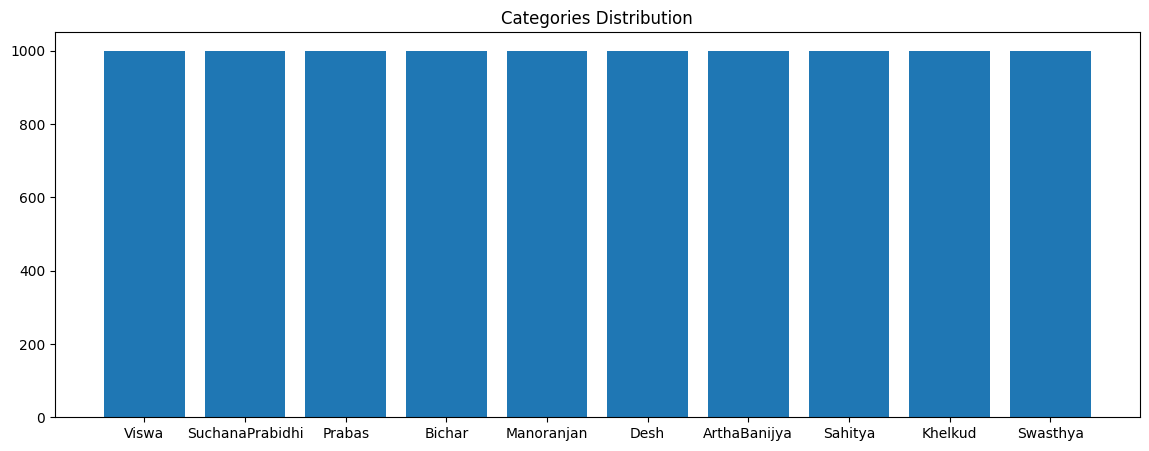

In [7]:
plt.figure(figsize=(14,5))
plt.bar(x=category_names,height=value_counts)
plt.title("Categories Distribution")

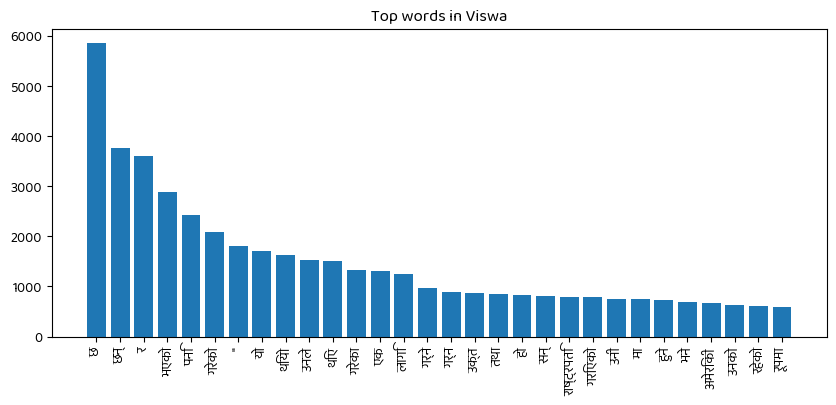

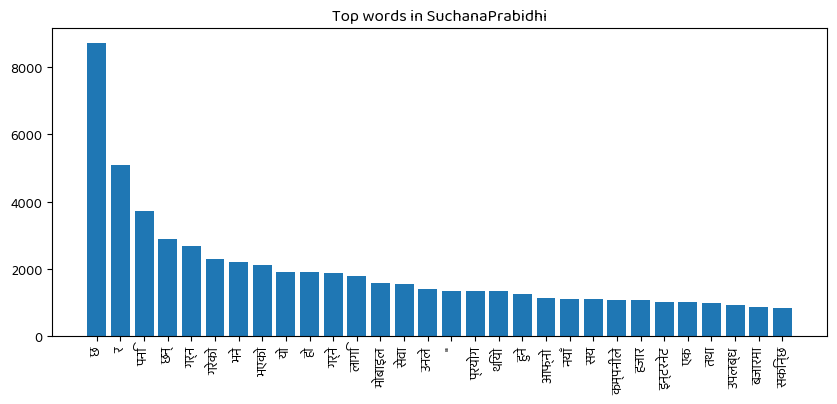

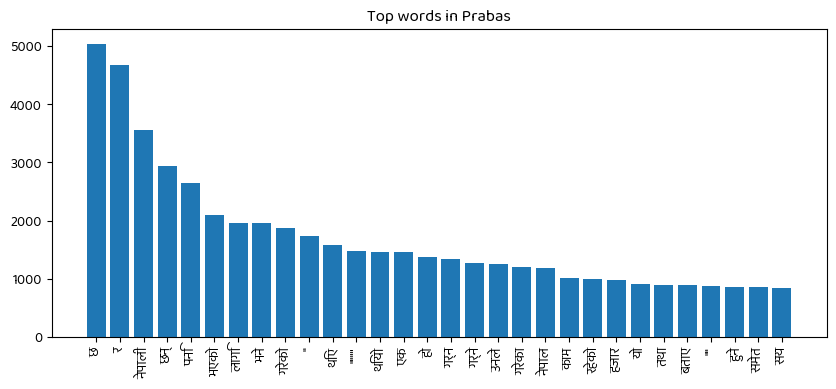

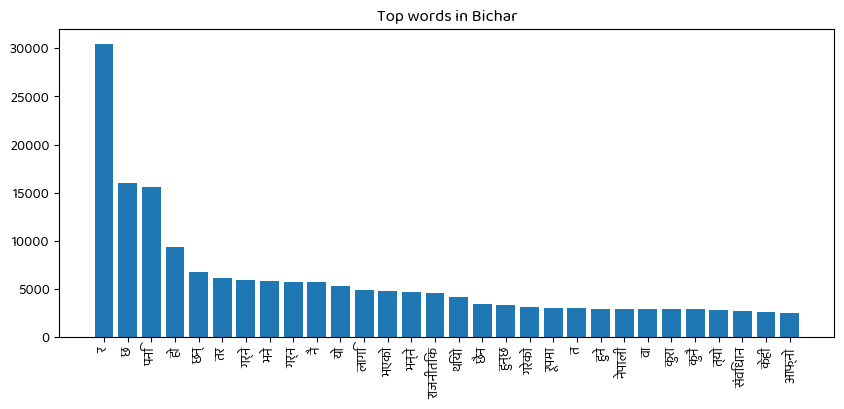

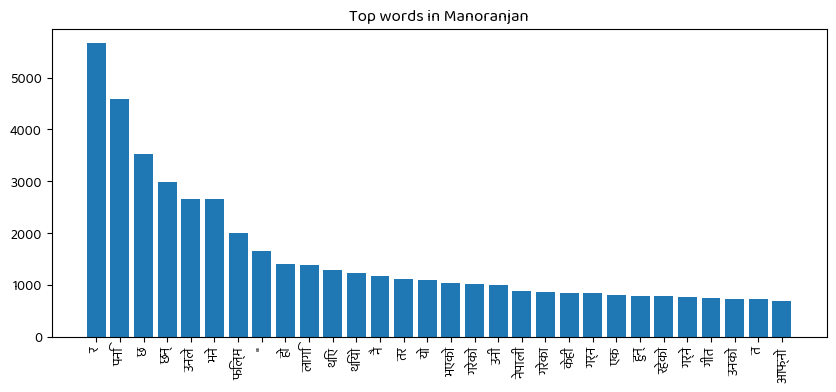

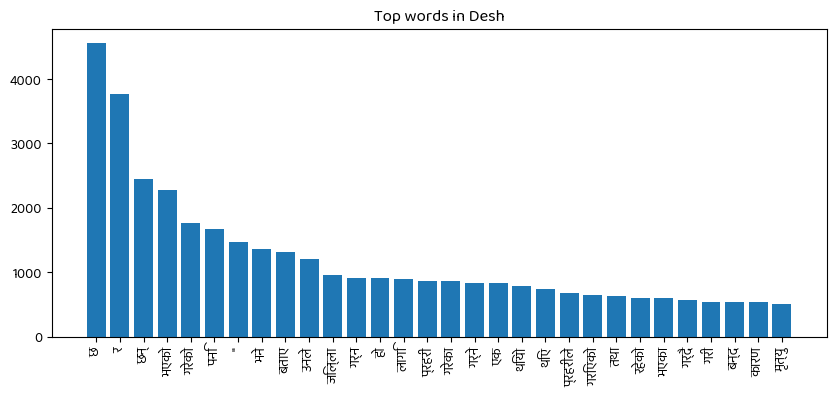

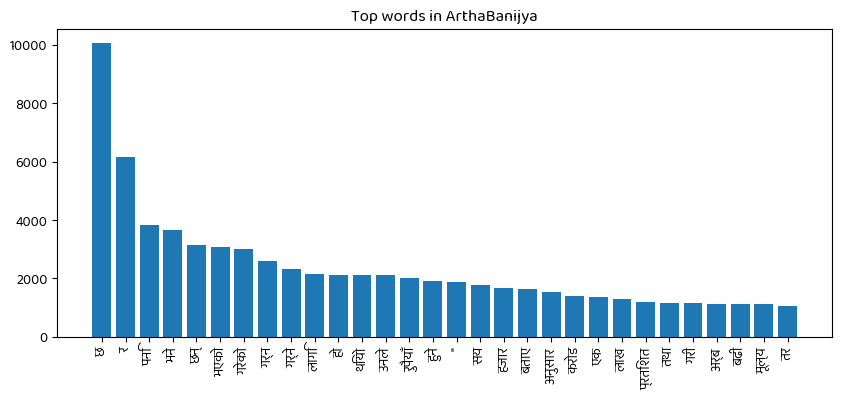

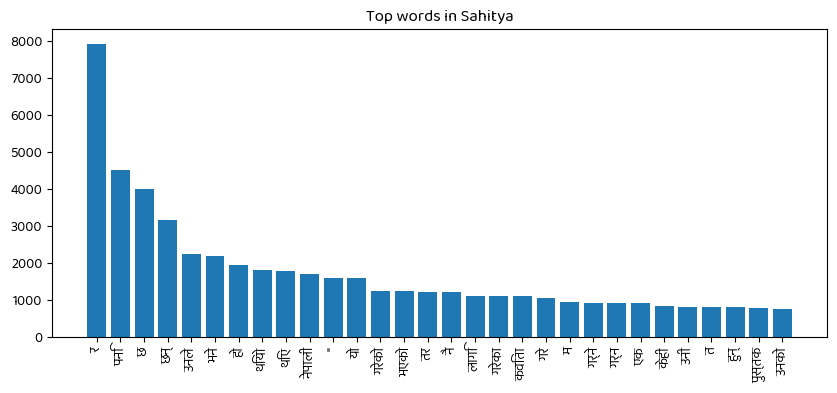

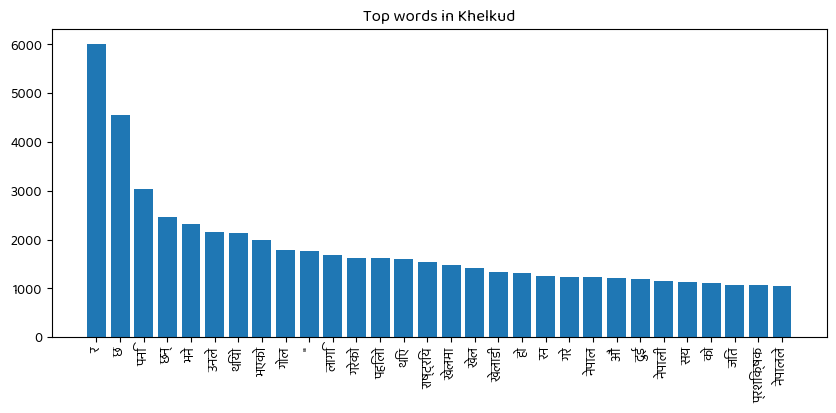

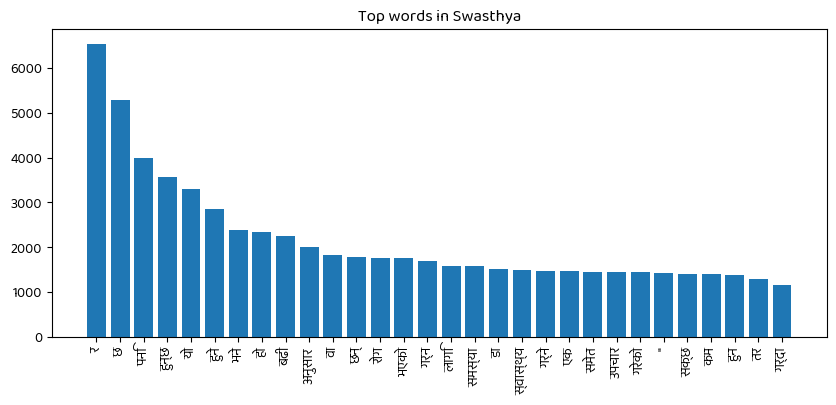

In [8]:
from collections import Counter
from matplotlib import font_manager, rcParams

font_path = "fonts/Baloo2-VariableFont_wght.ttf"

font_manager.fontManager.addfont(font_path)
font_prop = font_manager.FontProperties(fname=font_path)

rcParams["font.family"] = font_prop.get_name()


for category in category_names:
    text = " ".join(df[df['label'] == category]['text'].values)

    words = text.split()
    counter = Counter(words).most_common(30)

    words_, counts = zip(*counter)

    plt.figure(figsize=(10,4))
    plt.bar(words_, counts)
    plt.xticks(rotation=90)
    plt.title(f"Top words in {category}")
    plt.show()


In [25]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

In [28]:
model = make_pipeline(
    TfidfVectorizer(
        max_features=40000,
        ngram_range=(1,2),
        min_df=3
    ),
    ComplementNB(alpha=0.1)
)

In [34]:
model.fit(X_train, y_train)
y_preds = model.predict(X_test)

print(f'Accuracy = {accuracy_score(y_test, y_preds)*100:.3f}%')
print(classification_report(y_test, y_preds))

Accuracy = 83.000%
                 precision    recall  f1-score   support

   ArthaBanijya       0.80      0.88      0.84       200
         Bichar       0.74      0.91      0.81       200
           Desh       0.90      0.74      0.81       200
        Khelkud       0.94      0.97      0.96       200
     Manoranjan       0.82      0.69      0.75       200
         Prabas       0.88      0.69      0.77       200
        Sahitya       0.70      0.76      0.73       200
SuchanaPrabidhi       0.91      0.91      0.91       200
       Swasthya       0.83      0.94      0.89       200
          Viswa       0.84      0.82      0.83       200

       accuracy                           0.83      2000
      macro avg       0.84      0.83      0.83      2000
   weighted avg       0.84      0.83      0.83      2000



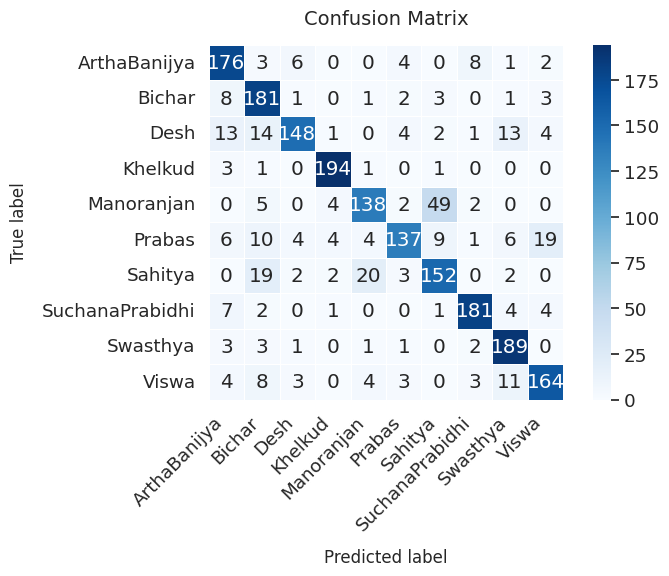

In [50]:

cm = confusion_matrix(y_test, y_preds, labels=model.classes_)
sns.set_theme(style="white", font_scale=1.2)
fig, ax = plt.subplots(figsize=(8, 6))
sns.heatmap(
    cm,
    annot=True,
    fmt="d",
    cmap="Blues",
    cbar=True,
    square=True,
    linewidths=0.5,
    linecolor="white",
    xticklabels=model.classes_,
    yticklabels=model.classes_,
    ax=ax
)
ax.set_xlabel("Predicted label", fontsize=12, labelpad=10)
ax.set_ylabel("True label", fontsize=12, labelpad=10)
ax.set_title("Confusion Matrix", fontsize=14, pad=15)
plt.xticks(rotation=45, ha="right")
plt.yticks(rotation=0)
plt.tight_layout()
plt.show()

In [53]:
sample = ["काठमाडौँ — प्रधानमन्त्री सुशीला कार्कीले फागुन २१ को निर्वाचनमा हिमाली जिल्लामा अत्यधिक चिसो बढेमा दोस्रो चरणमा निर्वाचन गरिने बताएकी छन् । पूर्वी नवलपरासीको हात्तिखोरस्थित नेपाली सेनाको ब्यारेकमा राष्ट्रिय सेवादल (एनसिसी) द्वारा आयोजित विद्यार्थीहरूको तालिम समापन समारोहमा आएकी प्रधानमन्त्री कार्कीले कान्तिपुरसँगको कुराकानीमा यस्तो बताएकी हुन् । प्रधानमन्त्री कार्कीले यतिबेला आफूहरूको पूरा ध्यान निर्वाचनमा मात्र केन्द्रित भएको बताउँदै निर्वाचन शान्तिपूर्ण र उत्साहजनक रूपमा हुने बताइन् । उनले सरकारले हिमाली जिल्लामा सहज तरिकाले निर्वाचन सम्पन्न गराउन गरिरहेको तयारीबारे पनि बताइन् । उनले हिमालका जिल्लामा गाडी आउजाउ गर्ने ठाउँमा गाडीबाट मतदाता ओसारेर भए पनि निर्वाचन गर्नेबारे सरकारले सोचिरहेको बताइन् । उनले भनिन्, ‘अत्यधिक चिसोले सक्दै नसक्ने अवस्था आइहाल्यो भने दोस्रो चरणमा हुन्छ ।’ उनले अहिले विशेष अवस्थामा निर्वाचन हुन लागेको बताउँदै निर्वाचनमा करिब ३० देखि ३२ अर्ब खर्च हुने पनि बताइन् । भनिन्, ‘देशमा स्थायित्व र शान्ति कायम गर्न यो निर्वाचन कोसेढुंगा हुनेछ ।’ प्रधानमन्त्री कार्कीले आफूलाई आजसम्म कसैले पनि निर्वाचन सार्ने विषयमा कुरा समेत नगरेको बताउँदै अब निर्वाचन सर्ने विषय हटिसकेको बताइन् । उनले भनिन्, ‘सर्दै सर्दैन । निर्वाचन तोकिएकै समयमा हुन्छ ।’ उनले यसअघि यो पाइन् र त्यो पाइने भन्ने समूहहरू पनि निर्वाचनमा भाग लिएको बताउँदै भनिन्, ‘यो निर्वाचनमा सबैको शान्तिपूर्ण र उत्साहजनक सहभागिताका लागि सरकार प्रतिबद्ध छ ।’"]
print("Sample Text: ", sample[0])
prediction = model.predict(sample)
print("Predicted Category: ", prediction[0])

Sample Text:  काठमाडौँ — प्रधानमन्त्री सुशीला कार्कीले फागुन २१ को निर्वाचनमा हिमाली जिल्लामा अत्यधिक चिसो बढेमा दोस्रो चरणमा निर्वाचन गरिने बताएकी छन् । पूर्वी नवलपरासीको हात्तिखोरस्थित नेपाली सेनाको ब्यारेकमा राष्ट्रिय सेवादल (एनसिसी) द्वारा आयोजित विद्यार्थीहरूको तालिम समापन समारोहमा आएकी प्रधानमन्त्री कार्कीले कान्तिपुरसँगको कुराकानीमा यस्तो बताएकी हुन् । प्रधानमन्त्री कार्कीले यतिबेला आफूहरूको पूरा ध्यान निर्वाचनमा मात्र केन्द्रित भएको बताउँदै निर्वाचन शान्तिपूर्ण र उत्साहजनक रूपमा हुने बताइन् । उनले सरकारले हिमाली जिल्लामा सहज तरिकाले निर्वाचन सम्पन्न गराउन गरिरहेको तयारीबारे पनि बताइन् । उनले हिमालका जिल्लामा गाडी आउजाउ गर्ने ठाउँमा गाडीबाट मतदाता ओसारेर भए पनि निर्वाचन गर्नेबारे सरकारले सोचिरहेको बताइन् । उनले भनिन्, ‘अत्यधिक चिसोले सक्दै नसक्ने अवस्था आइहाल्यो भने दोस्रो चरणमा हुन्छ ।’ उनले अहिले विशेष अवस्थामा निर्वाचन हुन लागेको बताउँदै निर्वाचनमा करिब ३० देखि ३२ अर्ब खर्च हुने पनि बताइन् । भनिन्, ‘देशमा स्थायित्व र शान्ति कायम गर्न यो निर्वाचन कोसेढुंगा हुनेछ ।’ प्रधानमन्त्

In [56]:
import joblib
joblib.dump(model,"model.joblib")

['model.joblib']